In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.stats.tests.test_influence
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor #IMPORTANT LABRARIES

In [98]:
df = pd.read_csv('/content/ToyotaCorolla - MLR.csv') #LOADING DATASET


In [99]:
print(df.columns)

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')


In [100]:
df.dtypes

,0
Price,int64
Age_08_04,int64
KM,int64
Fuel_Type,object
HP,int64
Automatic,int64
cc,int64
Doors,int64
Cylinders,int64
Gears,int64


In [101]:
df.describe()
#no missing values are present
#find out relationships between variables using pair plots and correlation matrices

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


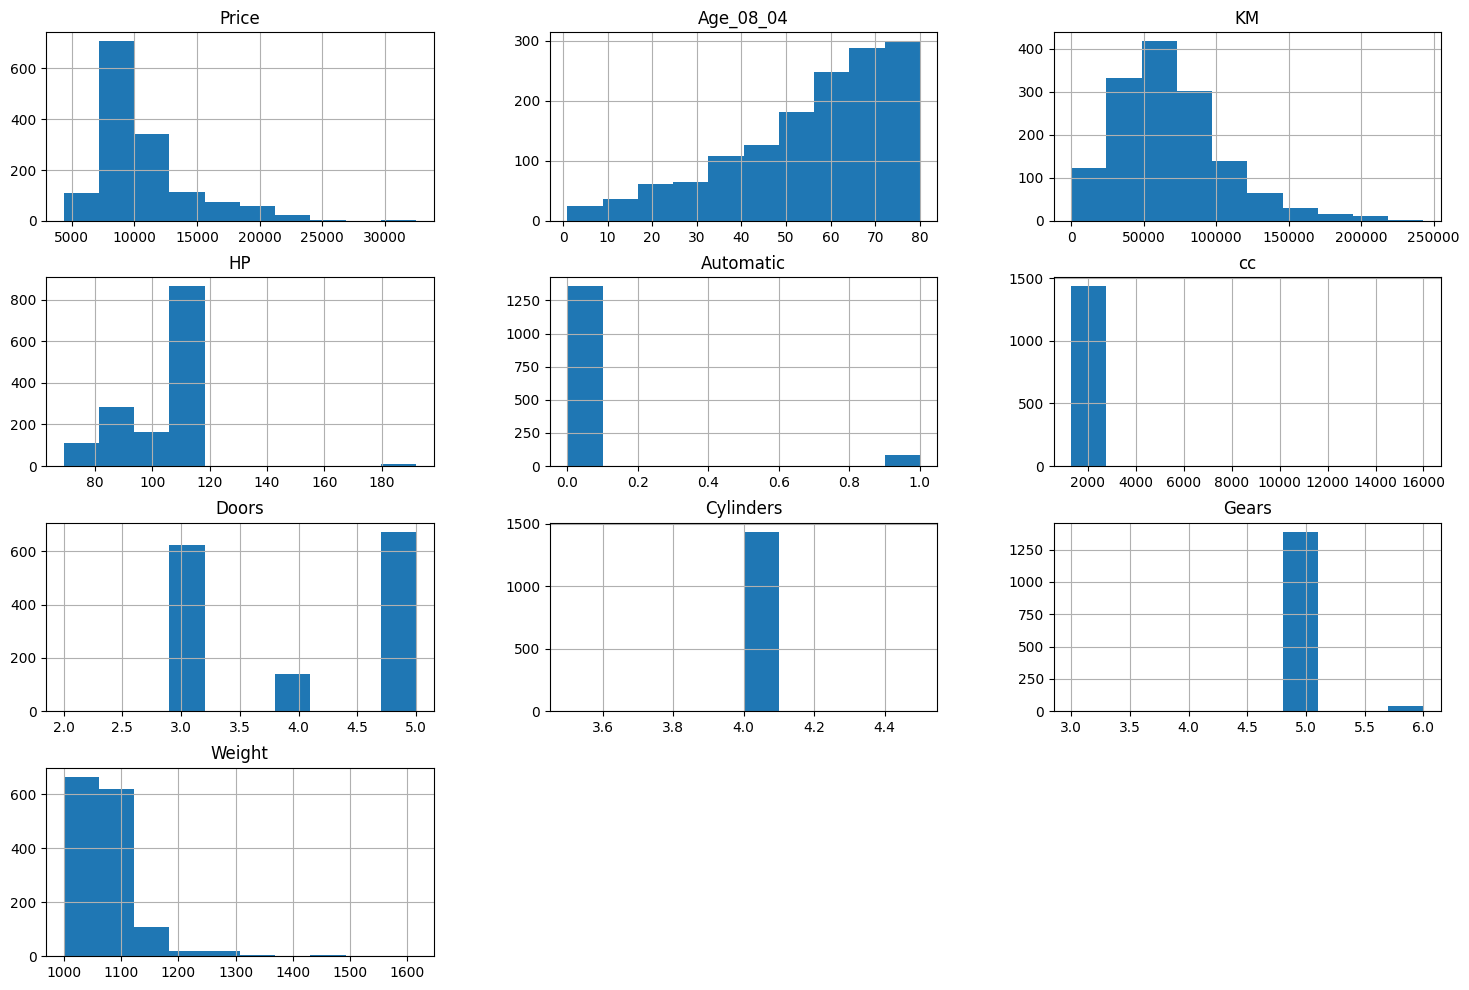

In [102]:
# @title EDA and Visualization
# Histograms
df.hist(figsize=(18, 12))
plt.show()

In [103]:
df1 = df [['Price','Age_08_04','KM','HP','cc','Doors','Gears','Weight']]
#consider only above columns
#prepare a prediction model for predicting Price

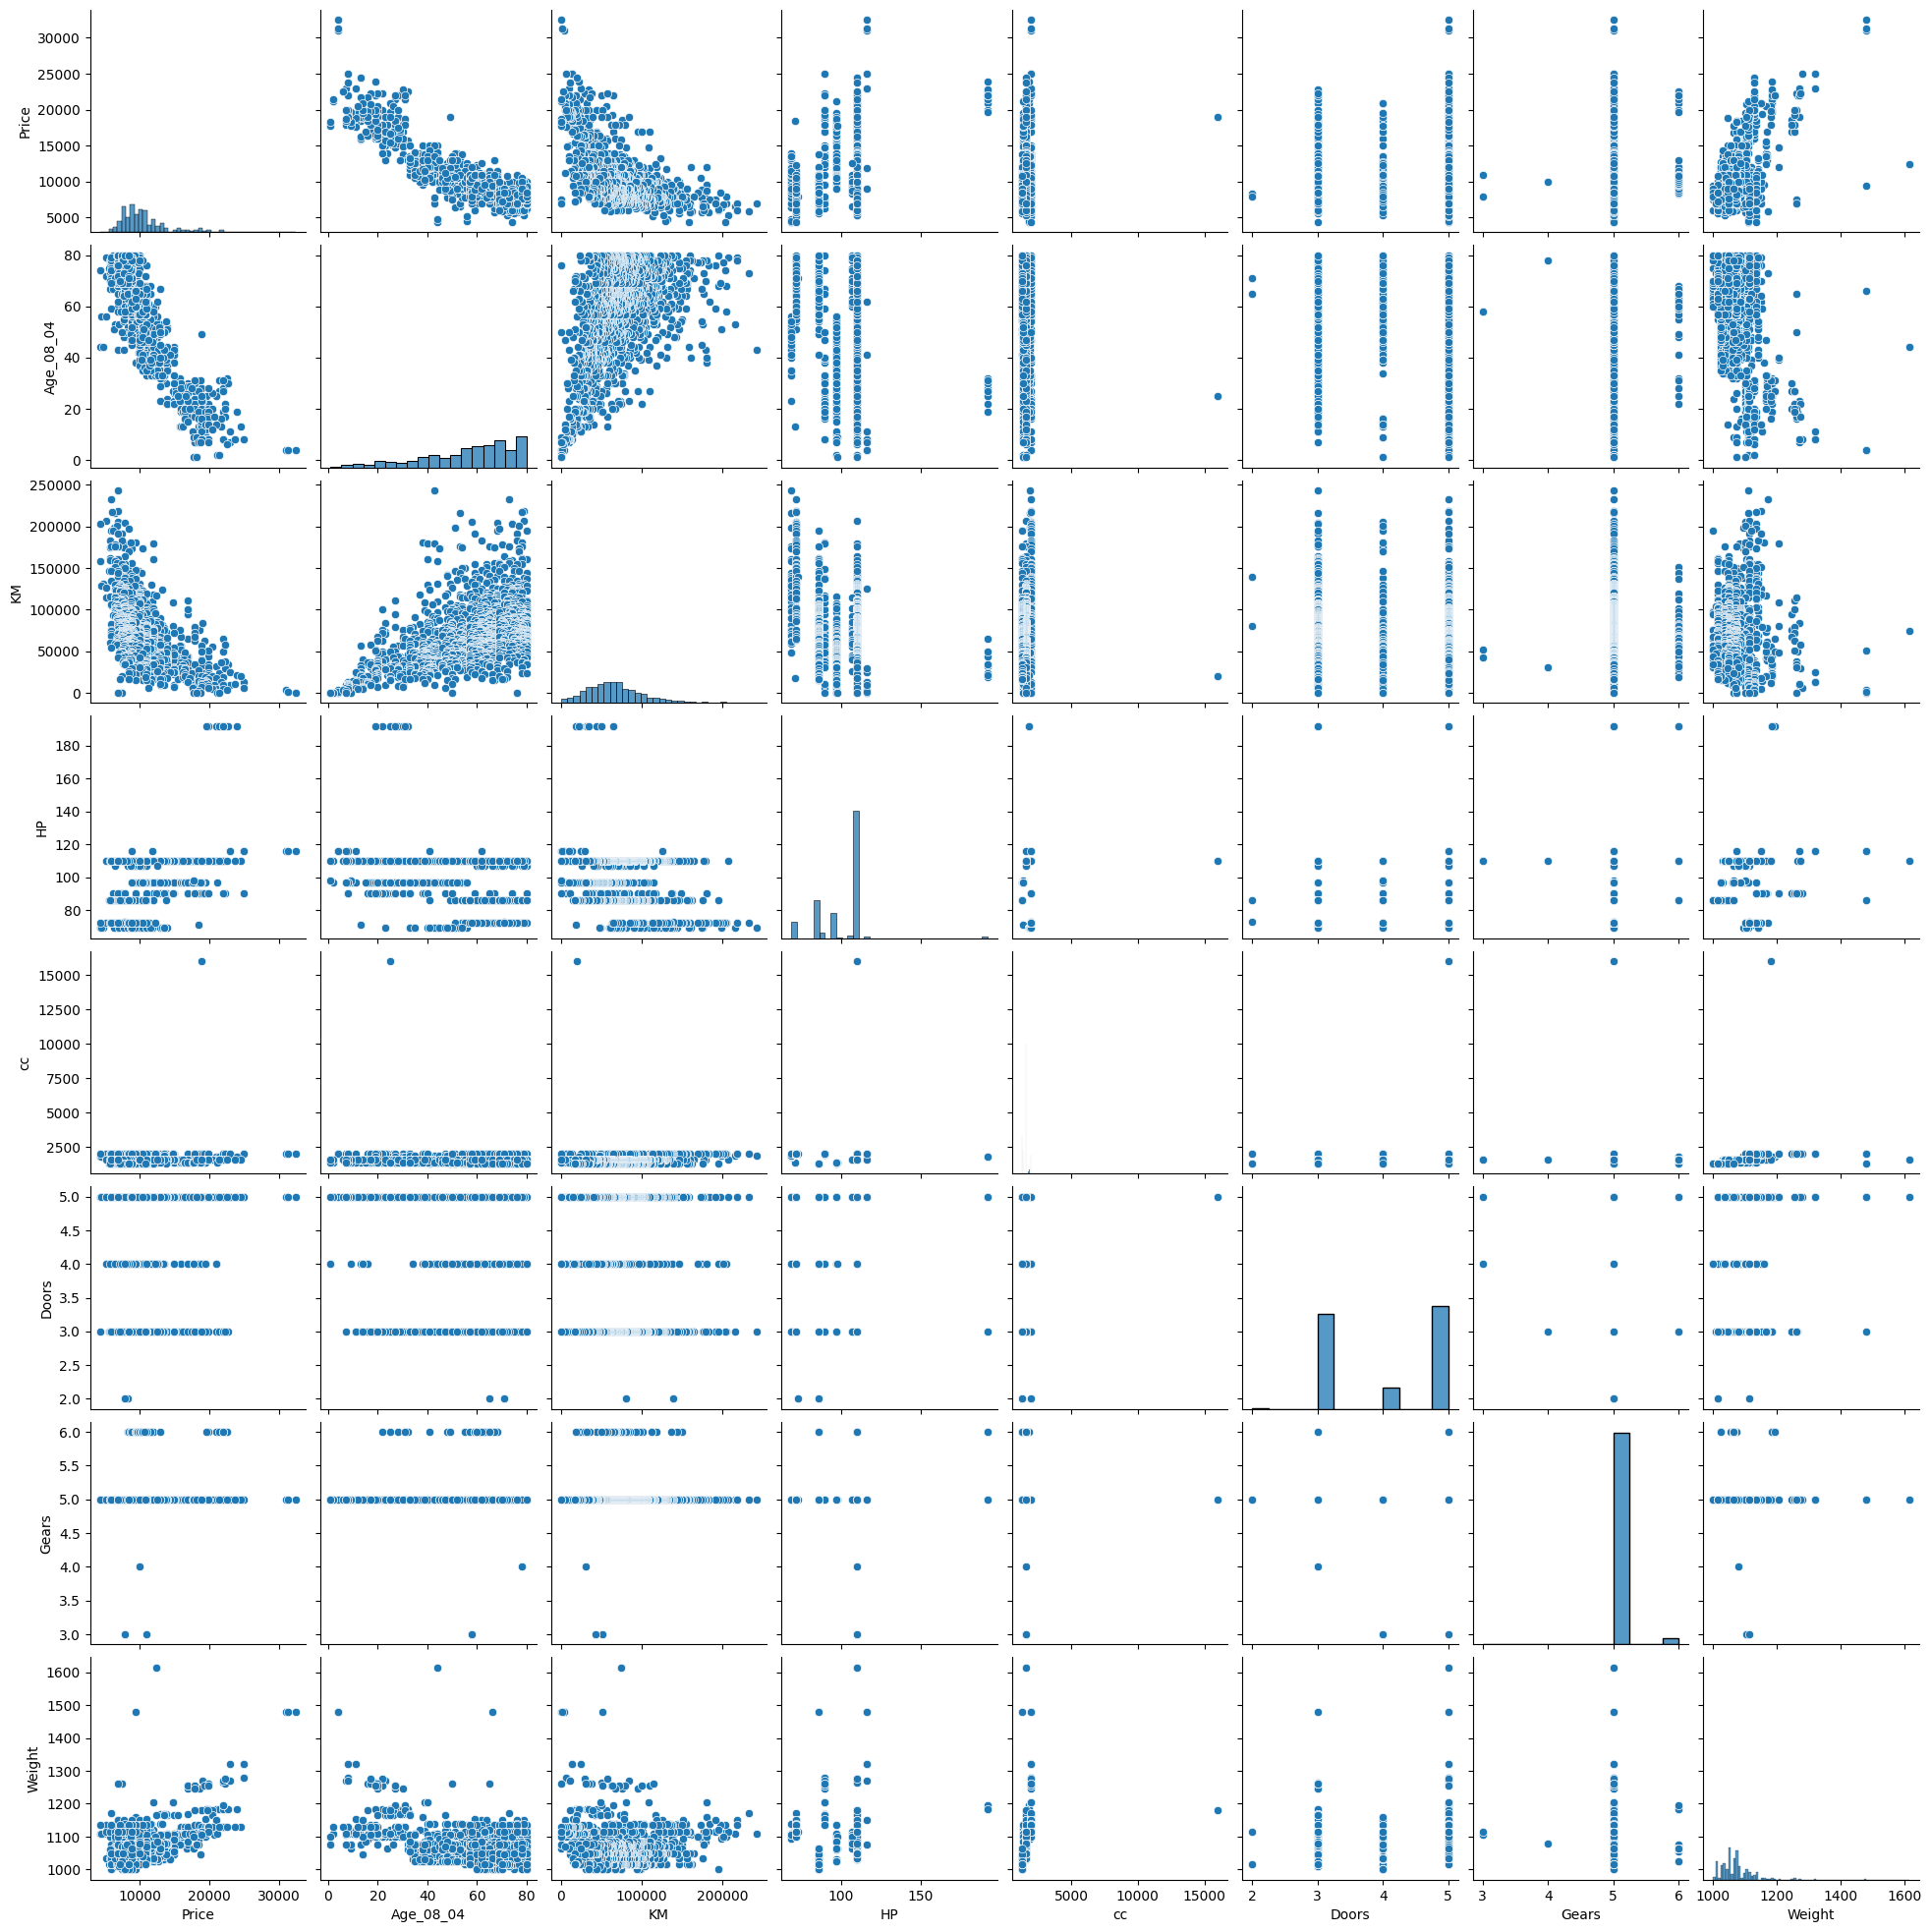

In [104]:

sns.pairplot(df1)

<Axes: >

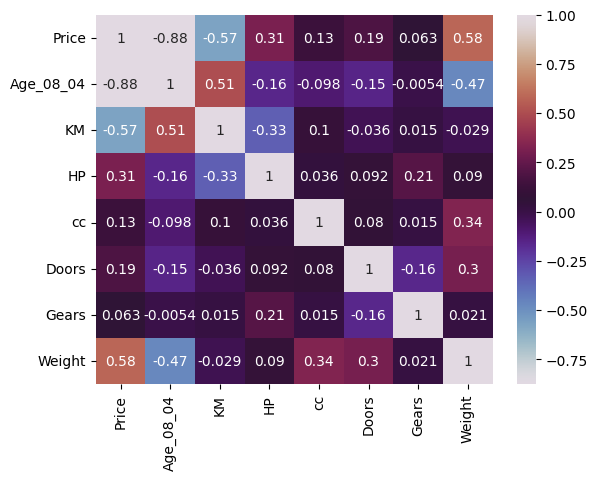

In [105]:
corrMatrix = df1.corr()
sns.heatmap(corrMatrix, annot=True, cmap='twilight') #heatmap (correlation matrix)

In [106]:
# @title Regression Model
X = df1[['Age_08_04','KM','HP','cc','Doors','Gears','Weight']]
Y = df1[['Price']]

In [107]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

In [108]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.404e+04
Date:                Thu, 24 Oct 2024   Prob (F-statistic):                        0.00
Time:                        12:19:05   Log-Likelihood:                         -12395.
No. Observations:                1436   AIC:                                  2.480e+04
Df Residuals:                    1429   BIC:                                  2.484e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age_08_04   -128.2143      2.393    -53.582      0.000    -132.908    -123.520
KM            -0.0187      0.001    -15.482      0.000      -0.021      -0.016
HP            28.8810      2.643     10.928      0.000      23.697      34.065
cc            -0.0387      0.090     -0.430      0.667      -0.215       0.138
Doors        -25.2960     40.304     -0.628      0.530    -104.358      53.766
Gears       -120.0561    143.314     -0.838      0.402    -401.184     161.072
Weight        15.8755      0.673     23.580      0.000      14.555      17.196
==============================================================================
Omnibus:                      135.961   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              894.322
Skew:                          -0.097   Prob(JB):                    6.32e-195
Kurtosis:                       6.861   Cond. No.                     3.13e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
#R sq and p Value of the Model is Good and the model can be accepted.
#However as you can see not all variables have acceptable p value.
#Thus we have Multicollinearity issue in our Data Frame

In [110]:
# @title Solving Multicollinearity
# Finding Cook's Distance
infl = model.get_influence()
summ_df = infl.summary_frame()
summ_df.sort_values('cooks_d', ascending=False)


,dfb_Age_08_04,dfb_KM,dfb_HP,dfb_cc,dfb_Doors,dfb_Gears,dfb_Weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
80,3.749299e-01,-1.901885,-0.691421,1.287699e+01,0.526698,1.098970e+00,-3.326238e+00,2.349123e+01,4.429284,0.893411,12.823362,4.458445,12.907786
221,-4.212948e-01,0.154975,-0.021303,5.352076e-01,0.530524,1.554774e+00,-1.718483e+00,4.229650e-01,-6.504662,0.065400,-1.720684,-6.600841,-1.746127
960,-4.782657e-01,0.334199,0.213452,3.747928e-01,0.547585,9.448874e-01,-1.176473e+00,2.053676e-01,-4.885950,0.056798,-1.198988,-4.925556,-1.208707
109,2.763611e-02,-0.214412,-0.000407,-1.493703e-01,-0.265886,-7.679024e-01,8.829243e-01,1.377379e-01,5.217905,0.034202,0.981919,5.266491,0.991062
111,1.970397e-02,-0.171145,0.001602,-1.240829e-01,-0.219535,-6.337624e-01,7.280623e-01,9.418834e-02,4.321734,0.034097,0.811984,4.348735,0.817057
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,-8.838964e-05,0.000165,-0.000055,-6.626014e-05,-0.000027,-4.609630e-05,7.410883e-05,1.204683e-08,-0.006869,0.001784,-0.000290,-0.006866,-0.000290
1245,-1.664668e-04,0.000021,-0.000084,-1.006819e-05,-0.000140,8.285861e-05,3.110237e-06,1.202551e-08,-0.005445,0.002831,-0.000290,-0.005443,-0.000290
56,-1.299069e-04,-0.000005,-0.000065,-6.516196e-05,0.000097,3.575043e-05,9.501124e-06,8.227166e-09,0.004216,0.003229,0.000240,0.004215,0.000240
283,-6.119619e-06,-0.000002,0.000004,-1.041464e-06,0.000010,-2.173484e-06,4.825987e-07,6.306813e-11,0.000483,0.001889,0.000021,0.000483,0.000021


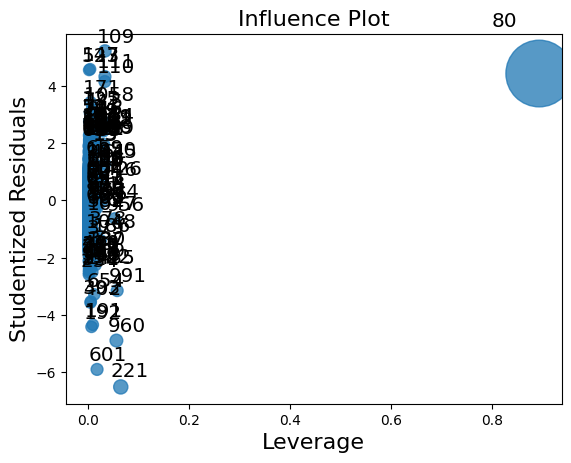

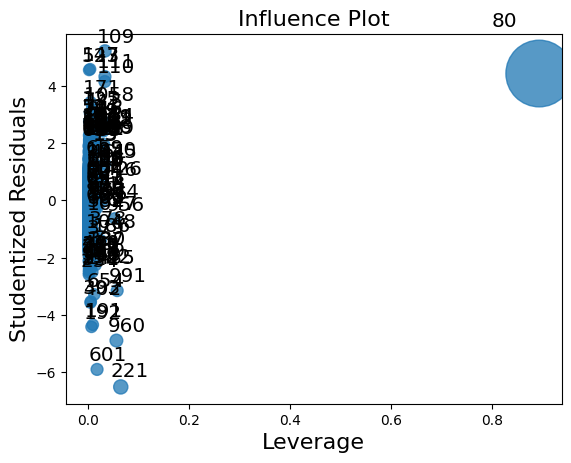

In [111]:
infl.plot_influence()

In [112]:
# Finding Variance Inflation Factor (VIF)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,15.5,Age_08_04
1,6.9,KM
2,57.1,HP
3,16.8,cc
4,21.7,Doors
5,403.8,Gears
6,406.1,Weight


As expected, Geras and Weight have a high variance inflation factor because they "explain" the same variance within this dataset. We would need to discard one of these variables to improve model and try to solve multicolinearity.

In [113]:
# Removed Weight fron the dataframe and Tested the model
new_X = df1[['Age_08_04','KM','HP','cc','Doors','Gears']]

In [114]:
new_model = sm.OLS(Y, new_X).fit()
new_predictions = new_model.predict(new_X)
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          1.173e+04
Date:                Thu, 24 Oct 2024   Prob (F-statistic):                        0.00
Time:                        12:19:11   Log-Likelihood:                         -12631.
No. Observations:                1436   AIC:                                  2.527e+04
Df Residuals:                    1430   BIC:                                  2.530e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age_08_04   -146.2519      2.671    -54.749      0.000    -151.492    -141.012
KM            -0.0141      0.001    -10.011      0.000      -0.017      -0.011
HP            32.1721      3.109     10.347      0.000      26.073      38.271
cc             0.5779      0.102      5.690      0.000       0.379       0.777
Doors        345.6124     43.720      7.905      0.000     259.850     431.375
Gears       2843.3474     81.156     35.036      0.000    2684.150    3002.545
==============================================================================
Omnibus:                      368.625   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2600.479
Skew:                           1.004   Prob(JB):                         0.00
Kurtosis:                       9.279   Cond. No.                     1.53e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
# Removed Index with highest Cook's distance to remove the hightest influencial ROW
new_df = df1.drop(df1.index[80])
new_X = new_df[['Age_08_04','KM','HP','cc','Doors','Gears']]
new_Y = new_df[['Price']]
final_model = sm.OLS(new_Y, new_X).fit()
predictions = final_model.predict(new_X)
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                          1.241e+04
Date:                Thu, 24 Oct 2024   Prob (F-statistic):                        0.00
Time:                        12:19:11   Log-Likelihood:                         -12581.
No. Observations:                1435   AIC:                                  2.517e+04
Df Residuals:                    1429   BIC:                                  2.521e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age_08_04   -139.7245      2.691    -51.919      0.000    -145.004    -134.445
KM            -0.0197      0.001    -13.158      0.000      -0.023      -0.017
HP            27.8260      3.059      9.098      0.000      21.826      33.826
cc             2.6129      0.242     10.800      0.000       2.138       3.088
Doors        286.6404     42.971      6.671      0.000     202.348     370.933
Gears       2349.2248     95.381     24.630      0.000    2162.122    2536.327
==============================================================================
Omnibus:                      287.086   Durbin-Watson:                   1.358
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1713.967
Skew:                           0.790   Prob(JB):                         0.00
Kurtosis:                       8.115   Cond. No.                     1.82e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1 - p-value < 0.01
Thus the model is accepted

2 - Adj. R-sqared == 0.981
Thus the model explains 98.1% of the variance in dependent variable

In [116]:
# @title Split the dataset into training and testing sets
# Define features (X) and target (y)
X = df1.drop('Price', axis=1)
y = df1['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split data into training and testing sets

In [117]:
# Drop rows with any missing values in X_train and y_train
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Update y_train to match X_train's index

In [118]:
# @title Three different multiple linear regression models
## Model 1: Simple Linear Regression
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [119]:
## Model 2: Ridge Regression
from sklearn.linear_model import Ridge
model2 = Ridge(alpha=1.0)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

In [120]:
## Model 3: Lasso Regression
from sklearn.linear_model import Lasso
model3 = Lasso(alpha=0.01, max_iter=10000)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

In [121]:
# Calculate evaluation metrics for each model
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

mse3 = mean_squared_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)

In [122]:
print("Model Performance:")
print(f"Model 1 - MSE: {mse1:.2f}, R2 Score: {r2_1:.2f}")
print(f"Model 2 - MSE: {mse2:.2f}, R2 Score: {r2_2:.2f}")
print(f"Model 3 - MSE: {mse3:.2f}, R2 Score: {r2_3:.2f}") #3 different models performance

Model Performance:
Model 1 - MSE: 1978740.47, R2 Score: 0.85
Model 2 - MSE: 1978948.62, R2 Score: 0.85
Model 3 - MSE: 1978743.60, R2 Score: 0.85


Models 1, 2, and 3 demonstrate comparable performance with negligible differences, achieving identical R2 scores of 0.85 and closely matched MSE values (1978740-1978949).

In [123]:
# @title  Ridge and Lasso methods
ridge_model = Ridge(alpha=0.5)
lasso_model = Lasso(alpha=0.001, max_iter=10000)

ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

print("\nRegularization Techniques:")
print(f"Ridge Regression MSE: {ridge_mse:.2f}")
print(f"Lasso Regression MSE: {lasso_mse:.2f}") #Lasso and Ridge with different alpha value


Regularization Techniques:
Ridge Regression MSE: 1978844.93
Lasso Regression MSE: 1978740.79


In [124]:
#Ridge Regression (MSE: 1978844.93) outperforms Lasso Regression (MSE:1978740.79), demonstrating superior predictive accuracy.

1.What is Normalization & Standardization and how is it helpful?
-> Normalization and standardization are data preprocessing techniques that rescale numeric data.
Normalization scales data between 0 and 1, preventing feature dominance and enhancing model interpretability.
Standardization transforms data to mean 0 and standard deviation 1, removing bias and scaling features equally.
Both improve model accuracy, convergence speed and interpretability by ensuring balanced feature contributions and reducing data variability.

2.What techniques can be used to address multicollinearity in multiple linear regression?
-> To address multicollinearity in multiple linear regression, consider these techniques:

1. Remove redundant variables: Drop highly correlated variables, retaining only one representative.
2. Regularization methods: Use Ridge, Lasso or Elastic Net regression to shrink coefficients.
3. Dimensionality reduction: Apply Principal Component Analysis (PCA) or Factor Analysis.
4. Variable transformation: Combine correlated variables into a single index.
5. Model selection: Choose models with lower variance inflation factors (VIF).
6. Cross-validation: Validate models on independent datasets.

These techniques mitigate multicollinearity's impact, enhancing model stability, accuracy and interpretability

In [125]:
#THANK YOU!!!